# Building Energy Efficiency

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

## Preprocessing

In [ ]:
energy_efficiency = fetch_ucirepo(id=242)

X = energy_efficiency.data.features
y = energy_efficiency.data.targets

print(energy_efficiency.metadata)
print(energy_efficiency.variables)

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', 'authors': '

In [ ]:
file_path = 'energy_efficiency.csv'
data = pd.read_csv(file_path)

# Split the data into training and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

## Analysis

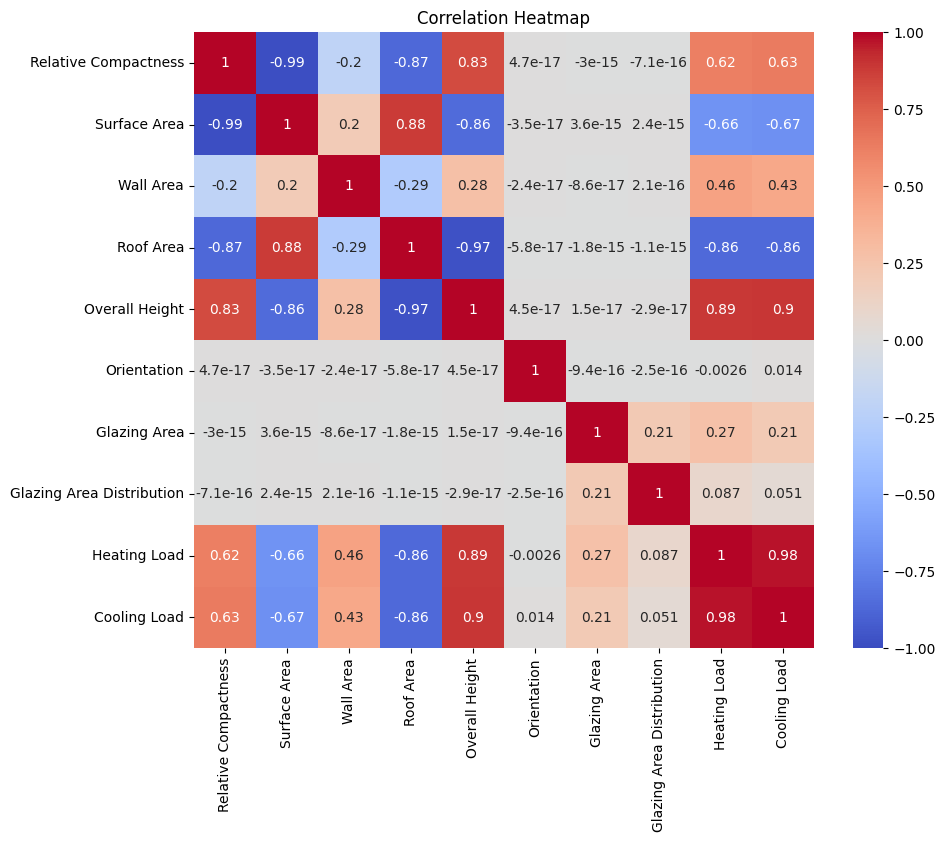

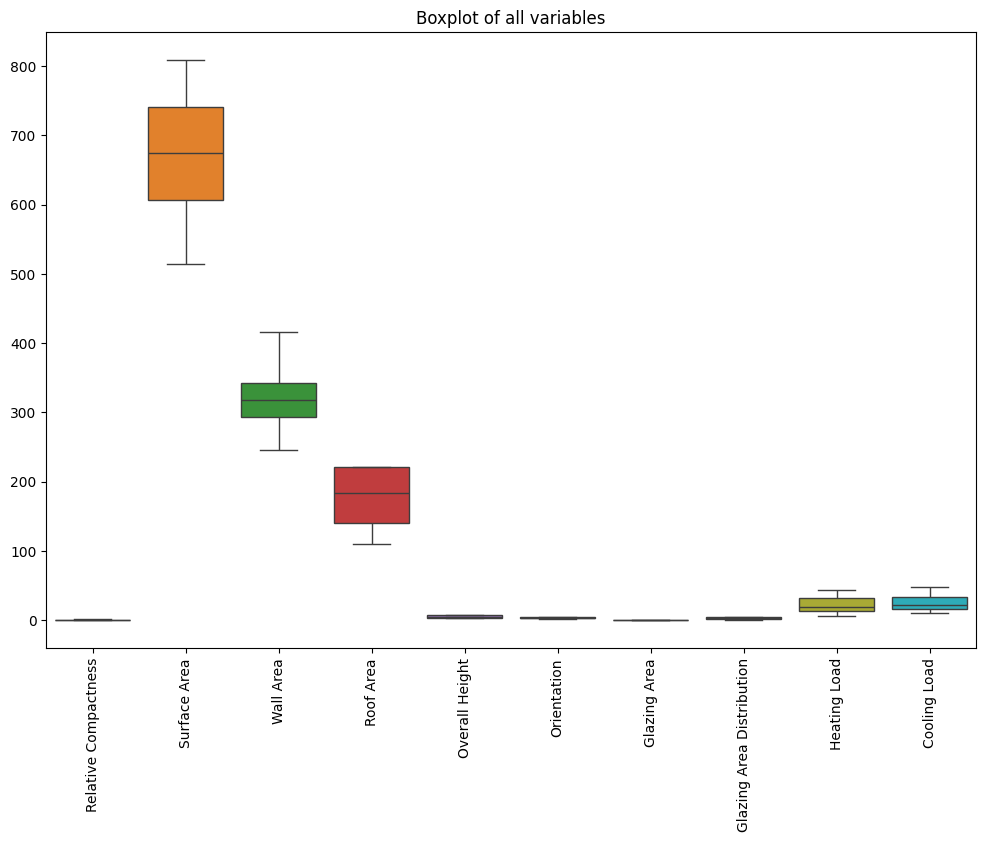

In [ ]:
file_path = 'energy_efficiency.csv'
data = pd.read_csv(file_path)

data_renamed = data.rename(columns={
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
})

plt.figure(figsize=(10, 8))
correlation_matrix = data_renamed.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=data_renamed)
plt.title("Boxplot of all variables")
plt.xticks(rotation=90)
plt.show()

## Classification Model Training

In [ ]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

def create_classes(value, bins, labels):
    return pd.cut(value, bins=bins, labels=labels)

bins = [0, 10, 20, 40, 100]
labels = ['low', 'medium', 'high', 'very high']

train_data['Heating Load Class'] = create_classes(train_data['Y1'], bins, labels)
train_data['Cooling Load Class'] = create_classes(train_data['Y2'], bins, labels)

train_data = train_data.drop(['Y1', 'Y2'], axis=1)

X_train = train_data.drop(['Heating Load Class', 'Cooling Load Class'], axis=1)
y_heating_train = train_data['Heating Load Class']
y_cooling_train = train_data['Cooling Load Class']

test_data['Heating Load Class'] = create_classes(test_data['Y1'], bins, labels)
test_data['Cooling Load Class'] = create_classes(test_data['Y2'], bins, labels)

test_data = test_data.drop(['Y1', 'Y2'], axis=1)

X_test = test_data.drop(['Heating Load Class', 'Cooling Load Class'], axis=1)
y_heating_test = test_data['Heating Load Class']
y_cooling_test = test_data['Cooling Load Class']

clf_heating = RandomForestClassifier(random_state=42)
clf_heating.fit(X_train, y_heating_train)

clf_cooling = RandomForestClassifier(random_state=42)
clf_cooling.fit(X_train, y_cooling_train)

y_heating_pred = clf_heating.predict(X_test)
heating_cm = confusion_matrix(y_heating_test, y_heating_pred)
heating_accuracy = accuracy_score(y_heating_test, y_heating_pred)
heating_report = classification_report(y_heating_test, y_heating_pred, output_dict=True)

y_cooling_pred = clf_cooling.predict(X_test)
cooling_cm = confusion_matrix(y_cooling_test, y_cooling_pred)
cooling_accuracy = accuracy_score(y_cooling_test, y_cooling_pred)
cooling_report = classification_report(y_cooling_test, y_cooling_pred, output_dict=True)

## Classification Model Evaluation

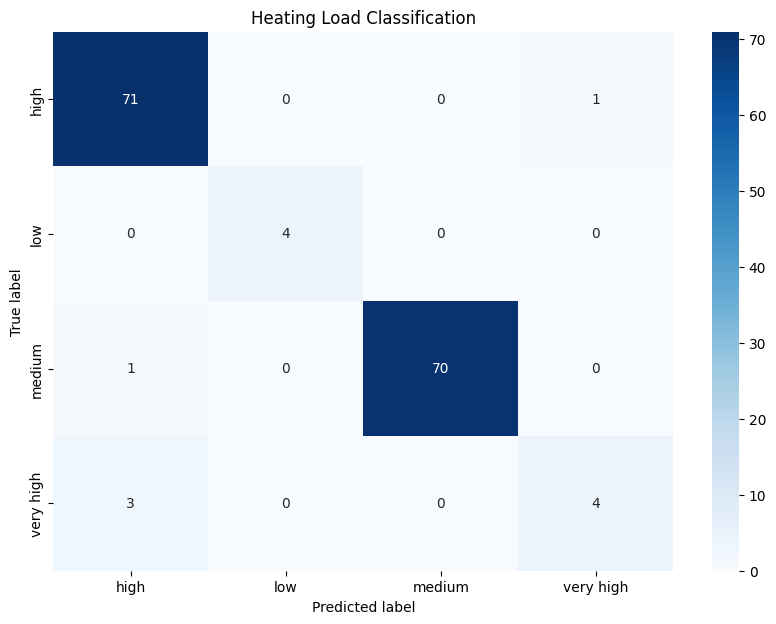

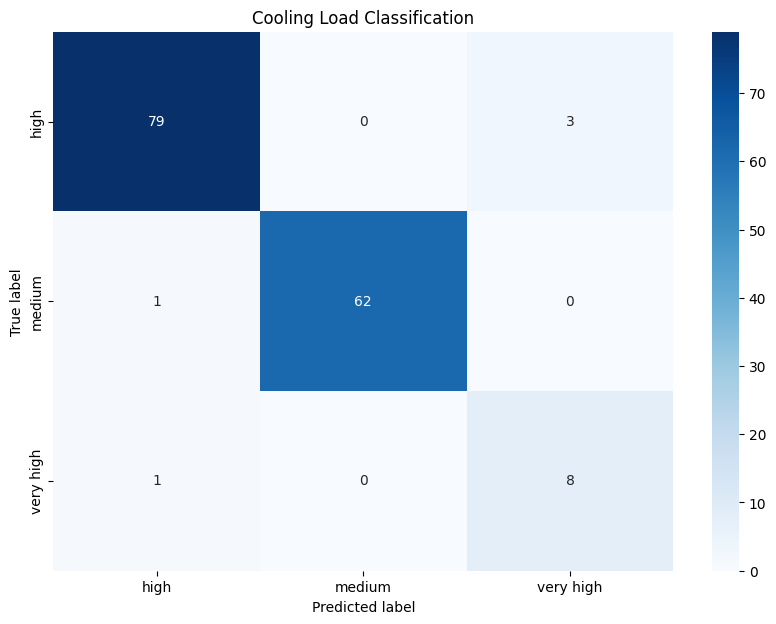

Heating Load Classification Accuracy: 96.75%

+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
|--------------+-------------+----------+------------+------------|
| high         |    0.946667 | 0.986111 |   0.965986 |  72        |
| low          |    1        | 1        |   1        |   4        |
| medium       |    1        | 0.985915 |   0.992908 |  71        |
| very high    |    0.8      | 0.571429 |   0.666667 |   7        |
| accuracy     |    0.967532 | 0.967532 |   0.967532 |   0.967532 |
| macro avg    |    0.936667 | 0.885864 |   0.90639  | 154        |
| weighted avg |    0.965974 | 0.967532 |   0.965676 | 154        |
+--------------+-------------+----------+------------+------------+

Cooling Load Classification Accuracy: 96.75%

+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
|--------------+-------

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(heating_cm, clf_heating.classes_, title='Heating Load Classification')
plot_confusion_matrix(cooling_cm, clf_cooling.classes_, title='Cooling Load Classification')

heating_report_df = pd.DataFrame(heating_report).transpose()
cooling_report_df = pd.DataFrame(cooling_report).transpose()

# Display accuracy and classification reports as tables
print("Heating Load Classification Accuracy: {:.2f}%\n".format(heating_accuracy * 100))
print(tabulate(heating_report_df, headers='keys', tablefmt='psql'))

print("\nCooling Load Classification Accuracy: {:.2f}%\n".format(cooling_accuracy * 100))
print(tabulate(cooling_report_df, headers='keys', tablefmt='psql'))

## Classification Model Application

In [ ]:
# Show predictions
test_data['Heating Load Prediction'] = y_heating_pred
test_data['Cooling Load Prediction'] = y_cooling_pred

print("Predictions for Heating Load:\n")
print(test_data[['Heating Load Class', 'Heating Load Prediction']])

print("\n\nPredictions for Cooling Load:\n")
print(test_data[['Cooling Load Class', 'Cooling Load Prediction']])

Predictions for Heating Load:

    Heating Load Class Heating Load Prediction
0               medium                  medium
1               medium                  medium
2                 high                    high
3            very high               very high
4               medium                  medium
..                 ...                     ...
149               high                    high
150               high                    high
151               high                    high
152               high                    high
153             medium                  medium

[154 rows x 2 columns]


Predictions for Cooling Load:

    Cooling Load Class Cooling Load Prediction
0               medium                  medium
1               medium                  medium
2                 high                    high
3            very high               very high
4               medium                    high
..                 ...                     ...
149          very h

## Regression Model Training

In [ ]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

X_train = train_data.drop(['Y1', 'Y2'], axis=1)
y_train = train_data[['Y1', 'Y2']]
X_test = test_data.drop(['Y1', 'Y2'], axis=1)
y_test = test_data[['Y1', 'Y2']]

y_train_heating = y_train['Y1']
y_test_heating = y_test['Y1']
y_train_cooling = y_train['Y2']
y_test_cooling = y_test['Y2']

model_heating = LinearRegression()
model_heating.fit(X_train, y_train_heating)

model_cooling = LinearRegression()
model_cooling.fit(X_train, y_train_cooling)

y_pred_heating = model_heating.predict(X_test)
mse_heating = mean_squared_error(y_test_heating, y_pred_heating)
r2_heating = r2_score(y_test_heating, y_pred_heating)

y_pred_cooling = model_cooling.predict(X_test)
mse_cooling = mean_squared_error(y_test_cooling, y_pred_cooling)
r2_cooling = r2_score(y_test_cooling, y_pred_cooling)

## Regression Model Evaluation

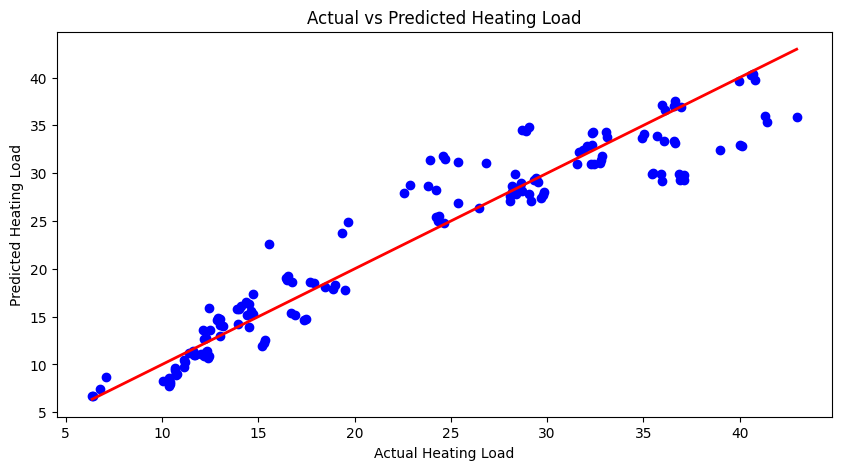

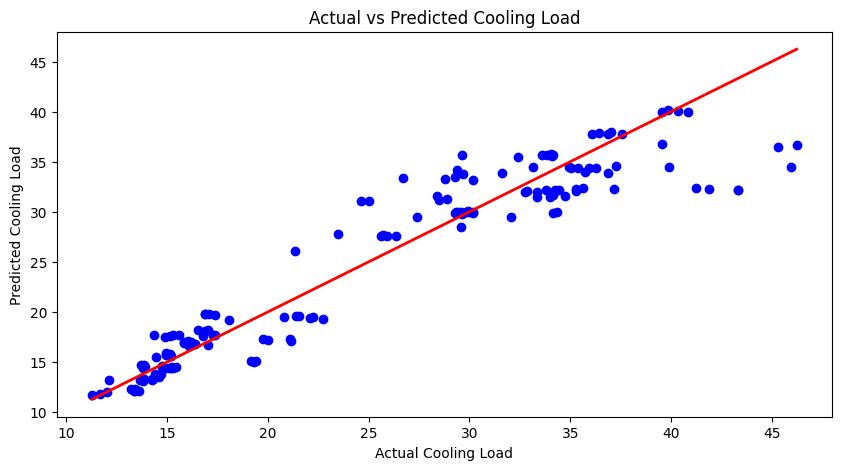

Heating Load - Mean Squared Error: 9.15171647030883, R2 Score: 0.9121982116568189
Cooling Load - Mean Squared Error: 9.896048105943512, R2 Score: 0.8931972456590836


In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_heating, y_pred_heating, color='blue')
plt.plot([y_test_heating.min(), y_test_heating.max()], [y_test_heating.min(), y_test_heating.max()], color='red', linewidth=2)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test_cooling, y_pred_cooling, color='blue')
plt.plot([y_test_cooling.min(), y_test_cooling.max()], [y_test_cooling.min(), y_test_cooling.max()], color='red', linewidth=2)
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Actual vs Predicted Cooling Load')
plt.show()

print(f'Heating Load - Mean Squared Error: {mse_heating}, R2 Score: {r2_heating}')
print(f'Cooling Load - Mean Squared Error: {mse_cooling}, R2 Score: {r2_cooling}')

## Regression Model Application

In [ ]:
predictions1 = pd.DataFrame({
    'Actual Heating Load': y_test_heating,
    'Predicted Heating Load': y_pred_heating,
})

predictions2 = pd.DataFrame({
    'Actual Cooling Load': y_test_cooling,
    'Predicted Cooling Load': y_pred_cooling
})

print("\n\nHeating Predictions:\n")
print(predictions1)

print("\n\nCooling Predictions:\n")
print(predictions2)

Heating Load - Mean Squared Error: 9.15171647030883, R2 Score: 0.9121982116568189
Cooling Load - Mean Squared Error: 9.896048105943512, R2 Score: 0.8931972456590836


Heating Predictions:

     Actual Heating Load  Predicted Heating Load
0                  16.47               18.869375
1                  13.17               14.035326
2                  32.82               31.332175
3                  41.32               35.931279
4                  16.69               15.339133
..                   ...                     ...
149                38.98               32.455306
150                36.66               33.173049
151                29.34               29.318578
152                29.54               29.107501
153                12.17               12.619084

[154 rows x 2 columns]


Cooling Predictions:

     Actual Cooling Load  Predicted Cooling Load
0                  16.90               19.755217
1                  16.39               16.774176
2                  32.78    